# Working with NumPy

[Reference](https://numpy.org/doc/stable/user/absolute_beginners.html)

NumPy is one of the most powerful libraries to work with numerical data in almost every field of science and engineering. NumPy API can be extensively used along with Pandas, SciPy, Matplotlib, scikit-learn, scikit-image and most other data science and scientific Python packages.

## Random Generations with `randint`

`randint(low, high, size, dtype)` returns a randomized number or an array of randomized numbers from the given range based on the parameters `low` and `high`, size is 1 by default.

In [1]:
import numpy as np
#returns a random number between 1-7
print(np.random.randint(1,7))

#returns an array of randomized numbers between 1-7
print(np.random.randint(1,7,size=10))

#returns a 2x3 array of randomized numbers between 1-7
print(np.random.randint(1,7,size=(2,3)))

1
[5 6 4 6 5 2 2 2 2 1]
[[4 3 1]
 [5 3 6]]


In [2]:
#prints a size 10 and size 100 array of randomized numbers between 1-7
few_rolls = np.random.randint(1,7,size=10)
many_rolls = np.random.randint(1,7,size=100)
print(few_rolls)
print(many_rolls)

[6 3 1 5 3 1 5 6 4 4]
[4 3 4 1 4 4 1 6 3 3 3 1 4 5 6 4 1 6 5 5 3 2 1 6 3 3 5 4 4 6 6 5 6 1 3 6 2
 4 4 4 5 5 1 3 4 6 5 4 5 2 1 1 1 5 1 5 6 3 5 3 2 2 1 6 2 6 1 4 3 4 1 3 2 6
 3 2 3 4 1 5 3 4 4 3 5 3 6 1 6 6 4 4 6 4 1 6 6 3 4 5]


## Basic Plotting with matplotlib 

Visualizations through graph plotting are done by implementing the matplotlib library. Their [Gallery](https://matplotlib.org/2.0.2/gallery.html) offers a variety of stylistic choices for different visualizations. We will start off with their histogram plots.

The code below plots the frequencies of each number between 1-7 categorized by bins. 

<BarContainer object of 6 artists>

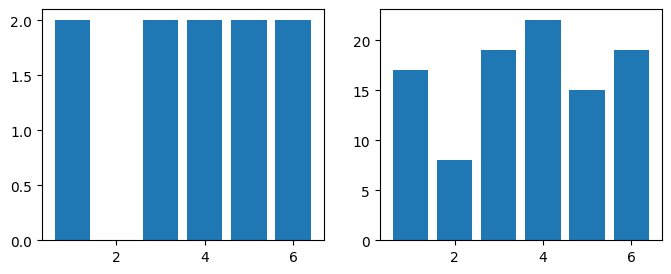

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

#plotting histogram plots

#plot the distriution of few_rolls(10 sets of random numbers between 1-7)
few_counts = np.histogram(few_rolls, bins=np.arange(0.5, 7.5))[0]

#plot the distriution of few_rolls(100 sets of random numbers between 1-7)
many_counts= np.histogram(many_rolls, bins=np.arange(0.5, 7.5))[0]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,3))
ax1.bar(np.arange(1,7), few_counts)
ax2.bar(np.arange(1,7), many_counts)

Note that the histogram contains **a tuple of two elements:**

- array of histogram counts (frequency of data for each category/bin)
- array of bin edges (boundaries for each category/bin)

In order to extract just the histogram counts, we index the first element of the tuple by adding `[0]`.

`np.arange()` returns evenly spaced values within a given interval, it roughly resembles the `range`, just that it returns an ndarray rather than a `range` instance. Use `linspace` for non-integer spacing.

## Working with SciPy

SciPy provides scientific and technical computing resources to aid in integration, optimization, linear algebra, and statistics. Let's work with an example of flipping a coin.

### Binomially Distributed Coin Flips

Recall that a coin flip has two possibilities that are binomially distributed: heads and tails:

(0.0, 55.0)

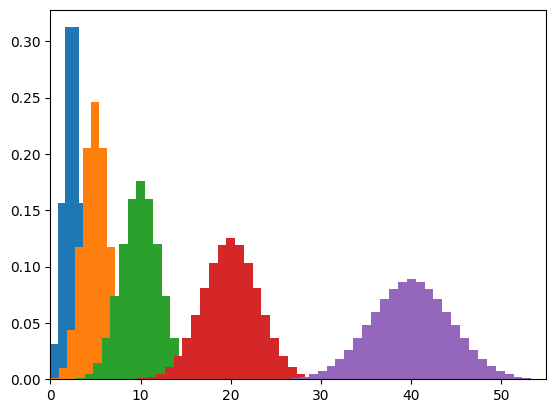

In [4]:
import scipy.stats as ss

#assigning a binomial distribution to coin
coin = ss.distributions.binom

#5, 10, 20, 40, and 80 observations of coin flips
for flips in [5, 10, 20, 40, 80]:
    success = np.arange(flips)
    distribution = coin.pmf(success, flips, 0.5) #PMF of distribution
    plt.hist(success, flips, weights = distribution)

plt.xlim(0,55)

(0.0, 55.0)

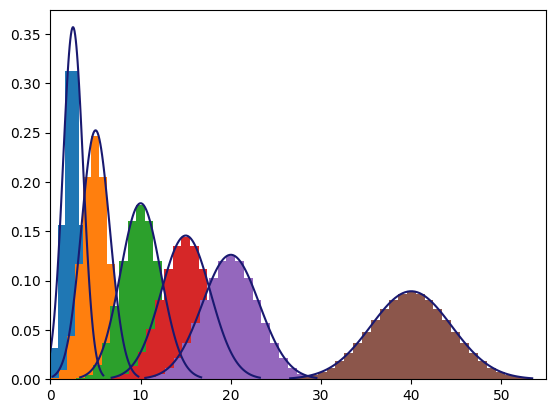

In [5]:
bin1 = ss.distributions.binom
norm1 = ss.distributions.norm

for flips in [5, 10, 20, 30, 40, 80]:
    success = np.arange(flips)
    distribution = bin1.pmf(success, flips, 0.5) #PMF of distribution
    plt.hist(success, flips, weights = distribution)

    #bin to norm approximation

    mu = flips * 0.5
    std_dev = np.sqrt(flips * 0.5 * (1-0.5))
    
    #set up x and y points for normal distribution

    norm_x = np.linspace(mu-3*std_dev, mu+3*std_dev, 100) #non-integer intervals
    norm_y = norm1.pdf(norm_x, mu, std_dev) #Probability Density Function

    plt.plot(norm_x, norm_y, 'midnightblue')

plt.xlim(0,55)

Text(0, 0.5, 'Cost\n(Parking Only)')

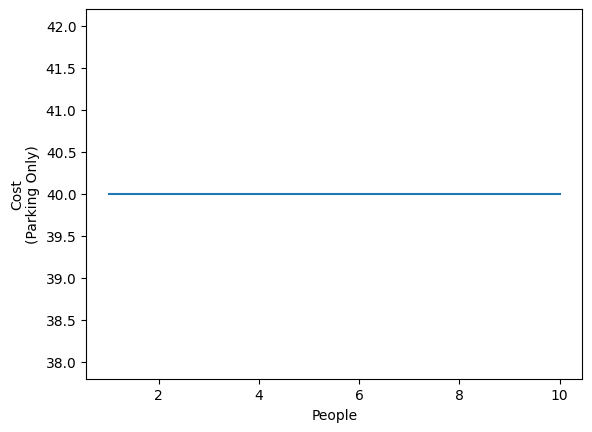

In [6]:
people = np.arange(1,11) #integer intervals from 1-11 (not including 11)

total_cost = np.ones_like(people) * 40.0
ax = plt.gca() #get reference of current axes instance within current figure
ax.plot(people, total_cost)
ax.set_xlabel("People")
ax.set_ylabel("Cost\n(Parking Only)")


,1,2,3,4,5,6,7,8,9,10
total_cost,120,200,280,360,440,520,600,680,760,840


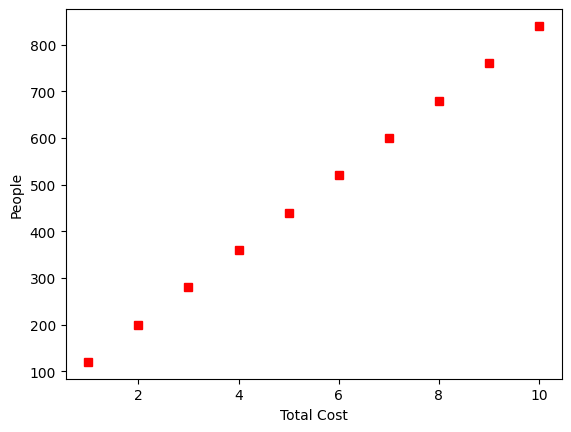

In [16]:
import pandas as pd

total_cost = 80.0 * people + 40.0
display(pd.DataFrame({'total_cost':total_cost.astype(int)}, index = people).T)
ax = plt.gca()
ax.plot(people, total_cost, 'rs')
ax.set_xlabel("Total Cost")
ax.set_ylabel("People")
plt.show()

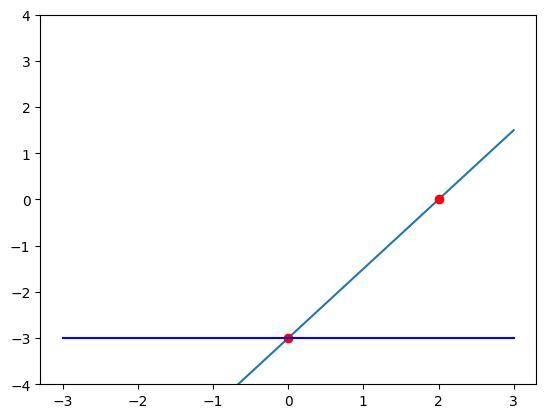

In [8]:
# create 100 x values from -3 to 3
xs = np.linspace(-3, 3, 100)

m, b = 1.5, -3

ax = plt.gca()

ys = m*xs + b 
ax.plot(xs, ys)
ax.set_ylim(-4, 4) #set y-axis from -4 to 4

ax.plot(0, -3,'ro') # y-intercept
ax.plot(2, 0,'ro') # two steps right gives three steps up

ys = 0*xs + b
ax.plot(xs, ys, 'b')

## 3-Dimensional Graphs

Our implementation of 3D Graphs require the module `mpl_toolkits` and import from `Axes3D`:

[[0 1]
 [0 1]] [[10 10]
 [20 20]]


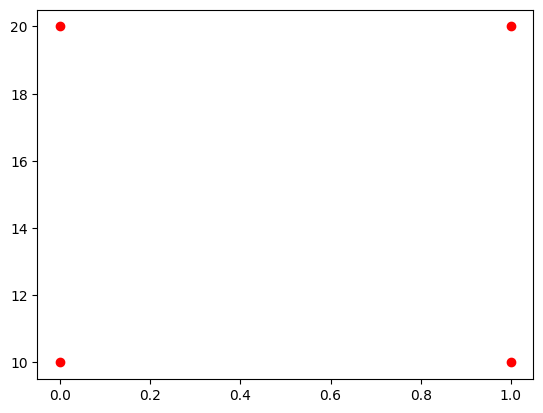

In [18]:
from mpl_toolkits.mplot3d import Axes3D

number_people = np.arange(1,11)
number_rbs = np.arange(0,20) #0-19 root beers

number_people, number_rbs = np.meshgrid([0,1],[10,20]) #obtain coordinate matrix of multiple arrays

print(number_people, number_rbs)
plt.plot(number_people, number_rbs, 'ro', linestyle='none')
plt.show()

Projection of 3d graphs can be done in this way:

- set figure reference and axes
- set the angle of the perspective
- set the surface area (3 variables)
- set axis labels

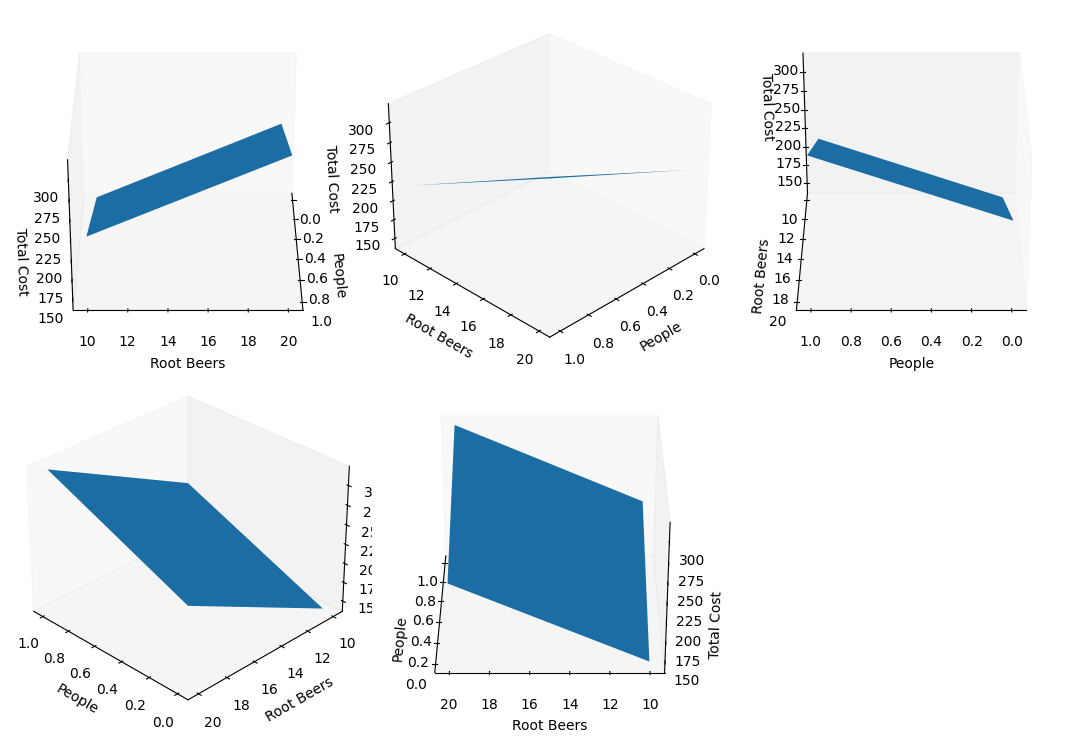

In [46]:
total_cost = 80 * number_people + 10 * number_rbs + 40

fig, axes = plt.subplots(2, 3, subplot_kw={'projection':'3d'}, figsize=(11, 8))
angles = [0, 45, 90, 135, 180]
for ax, angle in zip(axes.flat, angles):
    ax.plot_surface(number_people, number_rbs, total_cost)
    ax.set_xlabel("People")
    ax.set_ylabel("Root Beers")
    ax.set_zlabel("Total Cost")
    ax.azim = angle
    axes.flat[-1].axis('off')
    ax.grid(False)
    fig.tight_layout()

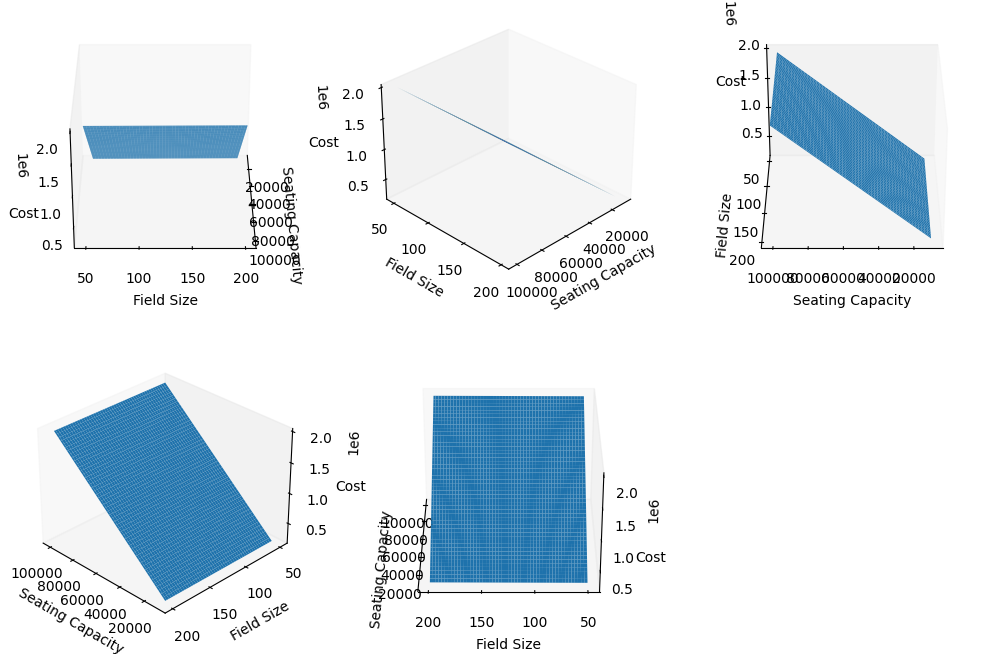

In [63]:
seating_capacity = np.arange(10000, 100000)
field_size = np.arange(50, 200)

seating_capacity, field_size = np.meshgrid(seating_capacity, field_size)
cost = 20 * seating_capacity + 50 * field_size + 30

fig, axes = plt.subplots(2, 3, subplot_kw={'projection':'3d'}, figsize=(11, 8))
angles = [0, 45, 90, 135, 180]
for ax, angle in zip(axes.flat, angles):
    ax.plot_surface(seating_capacity, field_size, cost)
    ax.set_xlabel("Seating Capacity")
    ax.set_ylabel("Field Size")
    ax.set_zlabel("Cost")
    ax.azim = angle
    axes.flat[-1].axis('off')
    ax.grid(False)
    fig.tight_layout(pad = 5.0)
